# Analysis of Turbines / Gear component of Wind Mill customers with focus on 42CrMo4 material

In [1]:
# Prerequsites

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
# Loading data

df=pd.read_excel(r'C:\Users\mohammed\Desktop\42Cr\42Crtest.xlsx')
df

,Sn,Customer,Order ID,Batch ID,Heat Number,Coupon,Material,Heat Treatment,Reduction Ratio,Customer Drawing ID,...,ISO 4967 Met.A,DIN 50602 - K4,Fine Grain Practice,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
0,73,C1,1106541,287,453375,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,5.98,JSB5-2087001,...,0.0,8.0,True,9.0,890.3,NaN,1033.0,NaN,17.4,62.4
1,76,C1,1106571,290,453355,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,7.95,JSB5-2203001,...,0.0,5.0,True,8.0,916.0,NaN,1038.2,NaN,17.2,61.8
2,79,C1,1107173,302,453374,OS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,5.98,JSB5-2087001,...,0.0,4.0,False,8.0,875.8,NaN,1003.8,NaN,17.0,61.1
3,88,C1,1108621,340,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,7.45,JSB5-1680001,...,0.0,3.0,True,8.0,841.5,NaN,970.0,NaN,18.6,63.6
4,89,C1,1108631,341,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,7.45,JSB5-1680001,...,0.0,3.0,True,8.0,833.4,NaN,985.4,NaN,19.0,62.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,28822,C2,1238036,36362,222869,OS,42CRMO4M-Ni JOM30,Quenching + Tempering,NaN,ROR03450-032BA03-001-112,...,2.5,20.0,NaN,6.0,819.5,NaN,958.1,NaN,19.0,63.0
1179,28830,C1,1237571,36373,T54345,OS,42CRMO4/09,Quenching + Tempering + Stress Relieving,6.50,JSB3-0474002,...,0.0,0.0,True,8.0,854.9,NaN,991.0,NaN,19.0,61.1
1180,28837,C1,1237578,36380,474661,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,7.95,JSB5-2203001,...,0.0,7.0,True,9.0,941.5,NaN,1063.4,NaN,16.4,57.4
1181,28872,C1,1236885,36448,474710,PS,42CRMO4MOD-NI/09,Quenching + Tempering,8.60,USD/V010/0031/AB,...,0.0,0.0,True,9.0,866.2,NaN,994.7,NaN,17.0,61.4


In [3]:
# Size of the dataframe

df.shape

(1183, 96)

In [61]:
# Column info

df.columns

Index(['Sn', 'Customer', 'Order ID', 'Batch ID', 'Heat Number', 'Coupon',
       'Material', 'Heat Treatment', 'Reduction Ratio', 'Customer Drawing ID',
       'Customer Drawing Revision ID', 'Weight', 'ø Ex', 'ø In', 'Height',
       'Thickness', 'Certificate Number', 'Supplier', 'Certificate Date',
       'PLM Raw Material Name', 'Primary Melting', 'Secondary Melting',
       'Refining', 'De-Oxidation', 'Degassing', 'Casting', 'Al [Aluminium]',
       'As [Arsenic]', 'B [Boron]', 'Bi [Bismuth]', 'C [Carbon]',
       'Ca [Calcium]', 'Co [Cobalt]', 'Cr [Chromium]', 'Cu [Copper]',
       'Fe (balance)', 'H [Hydrogen]', 'Mn [Manganese]', 'Mo [Molybdenum]',
       'N [Nitrogen]', 'Nb [Niobium]', 'Ni [Nickel]', 'O [Oxigen]',
       'P [Phosphorus]', 'Pb [Lead]', 'S [Sulfur]', 'Sb [Antimony]',
       'Si [Silicon]', 'Sn [Tin]', 'Ta [Tantalum]', 'Ti [Titanium]',
       'V [Vanadium]', 'W [Tungsten]', 'Zr [Zirconium]', 'B/N(ppm)',
       'Cu+10*Sn', 'V+Ti+Nb', 'Sn+As+Sb',
       'CEQ (Std) = 

In [5]:
#length of columns

len(df.columns)

96

In [6]:
# Memory usage

df.memory_usage()

Index                               128
Sn                                 9464
Customer                           9464
Order ID                           9464
Batch ID                           9464
                                   ... 
Upper Yield Strength (ReH)         9464
Ultimate Tensile Strength (UTS)    9464
YS/UTS Ratio                       9464
% Elongation (A)                   9464
% Reduction of Area (RoA | Z)      9464
Length: 97, dtype: int64

In [7]:
# Basic information
# Datatypes of columns and the non-null column counts.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183 entries, 0 to 1182
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sn                                         1183 non-null   int64  
 1   Customer                                   1183 non-null   object 
 2   Order ID                                   1183 non-null   int64  
 3   Batch ID                                   1183 non-null   int64  
 4   Heat Number                                1183 non-null   object 
 5   Coupon                                     1183 non-null   object 
 6   Material                                   1183 non-null   object 
 7   Heat Treatment                             1166 non-null   object 
 8   Reduction Ratio                            979 non-null    float64
 9   Customer Drawing ID                        1183 non-null   object 
 10  Customer Drawing Revisio

In [8]:
# Any null columns and their count ??

df.isnull().sum()

Sn                                    0
Customer                              0
Order ID                              0
Batch ID                              0
Heat Number                           0
                                   ... 
Upper Yield Strength (ReH)         1035
Ultimate Tensile Strength (UTS)      53
YS/UTS Ratio                       1177
% Elongation (A)                     56
% Reduction of Area (RoA | Z)        61
Length: 96, dtype: int64

In [9]:
df[df.isna().any(axis=1)]

,Sn,Customer,Order ID,Batch ID,Heat Number,Coupon,Material,Heat Treatment,Reduction Ratio,Customer Drawing ID,...,ISO 4967 Met.A,DIN 50602 - K4,Fine Grain Practice,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
0,73,C1,1106541,287,453375,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,5.98,JSB5-2087001,...,0.0,8.0,True,9.0,890.3,NaN,1033.0,NaN,17.4,62.4
1,76,C1,1106571,290,453355,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,7.95,JSB5-2203001,...,0.0,5.0,True,8.0,916.0,NaN,1038.2,NaN,17.2,61.8
2,79,C1,1107173,302,453374,OS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,5.98,JSB5-2087001,...,0.0,4.0,False,8.0,875.8,NaN,1003.8,NaN,17.0,61.1
3,88,C1,1108621,340,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,7.45,JSB5-1680001,...,0.0,3.0,True,8.0,841.5,NaN,970.0,NaN,18.6,63.6
4,89,C1,1108631,341,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,7.45,JSB5-1680001,...,0.0,3.0,True,8.0,833.4,NaN,985.4,NaN,19.0,62.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,28822,C2,1238036,36362,222869,OS,42CRMO4M-Ni JOM30,Quenching + Tempering,NaN,ROR03450-032BA03-001-112,...,2.5,20.0,NaN,6.0,819.5,NaN,958.1,NaN,19.0,63.0
1179,28830,C1,1237571,36373,T54345,OS,42CRMO4/09,Quenching + Tempering + Stress Relieving,6.50,JSB3-0474002,...,0.0,0.0,True,8.0,854.9,NaN,991.0,NaN,19.0,61.1
1180,28837,C1,1237578,36380,474661,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,7.95,JSB5-2203001,...,0.0,7.0,True,9.0,941.5,NaN,1063.4,NaN,16.4,57.4
1181,28872,C1,1236885,36448,474710,PS,42CRMO4MOD-NI/09,Quenching + Tempering,8.60,USD/V010/0031/AB,...,0.0,0.0,True,9.0,866.2,NaN,994.7,NaN,17.0,61.4


In [10]:
# Any duplicates ??

df[df.duplicated()]

,Sn,Customer,Order ID,Batch ID,Heat Number,Coupon,Material,Heat Treatment,Reduction Ratio,Customer Drawing ID,...,ISO 4967 Met.A,DIN 50602 - K4,Fine Grain Practice,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)


In [11]:
# Basic statistics

df.describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Sn,1183.0,14600.0,8013.0,73.0,8117.0,13770.0,21942.0,28946.0
Order ID,1183.0,1166432.0,263621.0,148195.0,1153075.0,1181106.0,1211433.0,3006385.0
Batch ID,1183.0,18158.0,9851.0,287.0,10211.0,16618.0,27294.0,36601.0
Reduction Ratio,979.0,8.0,2.0,4.0,7.0,8.0,8.0,20.0
Weight,1166.0,3964.0,2047.0,171.0,2482.0,4177.0,5379.0,9893.0
...,...,...,...,...,...,...,...,...
Upper Yield Strength (ReH),148.0,816.0,255.0,580.0,769.0,796.0,831.0,3842.0
Ultimate Tensile Strength (UTS),1130.0,1014.0,64.0,795.0,968.0,1015.0,1061.0,1198.0
YS/UTS Ratio,6.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
% Elongation (A),1127.0,18.0,2.0,12.0,17.0,18.0,19.0,63.0


In [12]:
# Pearson Correlation of the data

df.corr().round(5)*100

,Sn,Order ID,Batch ID,Reduction Ratio,Weight,ø Ex,ø In,Height,Thickness,Al [Aluminium],...,ASTM E45 Met.A - D thin,ISO 4967 Met.A,DIN 50602 - K4,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
Sn,100.000,6.956,99.954,7.303,6.421,-0.830,-0.435,9.786,-2.862,11.569,...,-5.021,4.354,12.030,0.800,1.415,-2.719,-0.677,-84.894,-14.629,-2.805
Order ID,6.956,100.000,6.777,1.404,7.842,7.636,7.426,-0.296,4.364,27.650,...,23.599,5.563,9.086,2.949,1.713,2.450,5.132,-81.530,-2.478,-4.073
Batch ID,99.954,6.777,100.000,6.929,6.374,-1.082,-0.695,10.007,-2.919,11.327,...,-4.637,4.347,12.091,0.484,1.469,-2.920,-0.582,-83.692,-14.868,-2.864
Reduction Ratio,7.303,1.404,6.929,100.000,17.226,57.030,60.160,-18.817,-19.251,5.843,...,0.502,2.648,17.276,-10.308,-3.948,83.646,-10.793,-15.335,13.092,22.188
Weight,6.421,7.842,6.374,17.226,100.000,66.003,63.519,45.745,42.016,6.371,...,15.555,13.280,45.057,-35.965,-0.938,-3.746,-6.410,-89.212,2.032,4.847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Yield Strength (ReH),-2.719,2.450,-2.920,83.646,-3.746,1.673,0.482,-10.405,5.148,4.509,...,-9.561,2.254,-3.965,0.745,26.561,100.000,18.420,NaN,-0.942,-9.467
Ultimate Tensile Strength (UTS),-0.677,5.132,-0.582,-10.793,-6.410,-18.216,-15.257,10.965,-26.174,0.402,...,19.234,-16.989,5.789,-7.792,33.759,18.420,100.000,80.626,-46.144,-65.666
YS/UTS Ratio,-84.894,-81.530,-83.692,-15.335,-89.212,-43.718,-4.459,-78.459,-97.343,-76.610,...,0.147,NaN,-1.800,-46.205,92.670,NaN,80.626,100.000,-57.463,15.084
% Elongation (A),-14.629,-2.478,-14.868,13.092,2.032,16.525,14.770,-14.702,17.755,2.887,...,-18.396,11.283,-5.684,9.019,-16.679,-0.942,-46.144,-57.463,100.000,37.976


In [13]:
# Covariance

df.cov().round()

,Sn,Order ID,Batch ID,Reduction Ratio,Weight,ø Ex,ø In,Height,Thickness,Al [Aluminium],...,ASTM E45 Met.A - D thin,ISO 4967 Met.A,DIN 50602 - K4,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
Sn,64208341.0,1.469295e+08,78896893.0,996.0,1054973.0,-52102.0,-25762.0,107142.0,-13170.0,4.0,...,-184.0,128.0,5995.0,76.0,25251.0,-45147.0,-3460.0,-194.0,-2860.0,-834.0
Order ID,146929533.0,6.949627e+10,175992218.0,4208.0,42433193.0,13921567.0,12755453.0,-94062.0,583057.0,279.0,...,28437.0,5407.0,149169.0,6633.0,974238.0,1715795.0,841922.0,-1084.0,-15548.0,-38338.0
Batch ID,78896893.0,1.759922e+08,97034801.0,1159.0,1287261.0,-83551.0,-50521.0,134689.0,-16515.0,4.0,...,-209.0,158.0,7408.0,57.0,32205.0,-59518.0,-3657.0,-224.0,-3571.0,-1046.0
Reduction Ratio,996.0,4.208000e+03,1159.0,3.0,598.0,532.0,559.0,-38.0,-14.0,0.0,...,0.0,0.0,2.0,-0.0,-16.0,250.0,-12.0,-0.0,0.0,1.0
Weight,1054973.0,4.243319e+07,1287261.0,598.0,4192112.0,963372.0,873478.0,116429.0,44947.0,0.0,...,146.0,101.0,5717.0,-863.0,-4254.0,-11833.0,-8290.0,-190.0,101.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Yield Strength (ReH),-45147.0,1.715795e+06,-59518.0,250.0,-11833.0,2179.0,688.0,-1303.0,746.0,0.0,...,-12.0,3.0,-52.0,2.0,3289.0,65106.0,1480.0,NaN,-12.0,-61.0
Ultimate Tensile Strength (UTS),-3460.0,8.419220e+05,-3657.0,-12.0,-8290.0,-9157.0,-7227.0,956.0,-965.0,0.0,...,6.0,-4.0,23.0,-6.0,4774.0,1480.0,4062.0,4.0,-72.0,-153.0
YS/UTS Ratio,-194.0,-1.084000e+03,-224.0,-0.0,-190.0,-21.0,-2.0,-3.0,-10.0,-0.0,...,0.0,0.0,-0.0,-0.0,6.0,NaN,4.0,0.0,-0.0,0.0
% Elongation (A),-2860.0,-1.554800e+04,-3571.0,0.0,101.0,322.0,272.0,-50.0,25.0,0.0,...,-0.0,0.0,-1.0,0.0,-90.0,-12.0,-72.0,-0.0,6.0,3.0


In [14]:
# Skewness

df.skew()

C:\Users\mohammed\AppData\Local\Temp/ipykernel_8212/1066516757.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sn                                  0.071849
Order ID                            1.584986
Batch ID                            0.145082
Reduction Ratio                     1.886473
Weight                              0.263263
                                     ...    
Upper Yield Strength (ReH)         11.485904
Ultimate Tensile Strength (UTS)    -0.269814
YS/UTS Ratio                       -2.097015
% Elongation (A)                    9.317781
% Reduction of Area (RoA | Z)      -0.785555
Length: 78, dtype: float64

In [15]:
# Creating Categorical and Numerical columns

cat_columns=[x for x in df.columns if df[x].dtype=='O']
num_columns=[x for x in df.columns if df[x].dtype!='O']

In [16]:
df[cat_columns].head()

,Customer,Heat Number,Coupon,Material,Heat Treatment,Customer Drawing ID,Customer Drawing Revision ID,Certificate Number,Supplier,Certificate Date,PLM Raw Material Name,Primary Melting,Secondary Melting,Refining,De-Oxidation,Degassing,Casting,De,Fine Grain Practice
0,C1,453375,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,JSB5-2087001,REV.C,235114/1,S1,NaN,42CRMO4MOD-NI/09,EAF - Electric Arc Furnace,NaN,NaN,SI-AL - Si/Al Deox. (Fully killed steel),LVD - Ladle Vacum Degassing,NaN,NaN,True
1,C1,453355,PS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,JSB5-2203001,REV.A,235023/1,S1,NaN,42CRMO4MOD-NI/09,EAF - Electric Arc Furnace,NaN,NaN,SI-AL - Si/Al Deox. (Fully killed steel),LVD - Ladle Vacum Degassing,NaN,NaN,True
2,C1,453374,OS,42CRMO4MOD-NI/09,Quenching + Tempering + Stress Relieving,JSB5-2087001,REV.C,235272/1,S1,NaN,42CRMO4MOD-NI/09,EAF - Electric Arc Furnace,NaN,NaN,SI-AL - Si/Al Deox. (Fully killed steel),LVD - Ladle Vacum Degassing,NaN,NaN,False
3,C1,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,JSB5-1680001,B,231022/1,S1,NaN,42CRMO4/09,EAF - Electric Arc Furnace,NaN,NaN,SI-AL - Si/Al Deox. (Fully killed steel),LVD - Ladle Vacum Degassing,NaN,NaN,True
4,C1,452479,PS,42CRMO4/09,Quenching + Tempering + Stress Relieving,JSB5-1680001,B,231022/1,S1,NaN,42CRMO4/09,EAF - Electric Arc Furnace,NaN,NaN,SI-AL - Si/Al Deox. (Fully killed steel),LVD - Ladle Vacum Degassing,NaN,NaN,True


In [17]:
df[num_columns].head()

,Sn,Order ID,Batch ID,Reduction Ratio,Weight,ø Ex,ø In,Height,Thickness,Al [Aluminium],...,ASTM E45 Met.A - D thin,ISO 4967 Met.A,DIN 50602 - K4,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
0,73,1106541,287,5.98,3921.0,2087.0,1812.0,471.0,137.5,0.032,...,1.5,0.0,8.0,9.0,890.3,NaN,1033.0,NaN,17.4,62.4
1,76,1106571,290,7.95,4703.0,2203.0,1893.0,493.0,155.0,0.023,...,1.0,0.0,5.0,8.0,916.0,NaN,1038.2,NaN,17.2,61.8
2,79,1107173,302,5.98,3921.0,2087.0,1812.0,471.0,137.5,0.024,...,1.0,0.0,4.0,8.0,875.8,NaN,1003.8,NaN,17.0,61.1
3,88,1108621,340,7.45,2529.0,1682.0,1432.0,398.0,125.0,0.024,...,1.0,0.0,3.0,8.0,841.5,NaN,970.0,NaN,18.6,63.6
4,89,1108631,341,7.45,2529.0,1682.0,1432.0,398.0,125.0,0.024,...,1.0,0.0,3.0,8.0,833.4,NaN,985.4,NaN,19.0,62.7


In [18]:
# Unique data in Categorical columns

[ print(x,' - ',len(df[x].unique()),' - ',df[x].unique(),'\n') for x in df[cat_columns].columns ]

Customer  -  26  -  ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22' 'C23' 'C24' 'C25'
 'C26'] 

Heat Number  -  589  -  [453375 453355 453374 452479 453377 453354 453379 453358 453378 453356
 453376 190095 453575 451569 453359 451570 452481 '99286K' 453906 453910
 453909 453908 454124 453574 255559 '12963K' 454120 454122 453905 454161
 452482 451297 191405 454162 454160 'T26522' 455246 454159 454123 192685
 192726 455247 454158 454696 'T32356' 241270 454695 454694 256687 455784
 451296 'T32358' 453573 192786 455785 455787 455788 455786 455789 193568
 193628 451295 190233 193479 192670 193668 193922 456674 440946 241920
 456884 193724 456676 193627 457215 190094 'T32908' 256686 456693 457216
 'T36569' 193525 457218 457214 457219 457626 457625 457786 457629 457765
 457764 'T36566' 'T36570' 457628 256676 457399 457787 457788 457627 457785
 457763 457767 457766 'T38633' 261830 261829 'T38875' 452321 'T38870'
 4564

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [19]:
df.groupby('Supplier').sum()

,Sn,Order ID,Batch ID,Reduction Ratio,Weight,ø Ex,ø In,Height,Thickness,Al [Aluminium],...,ASTM E45 Met.A - D thin,ISO 4967 Met.A,DIN 50602 - K4,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
Supplier,,,,,,,,,,,,,,,,,,,,,
S1,13140993,1058545828,16335294,5933.86,3581674.0,1877988.0,1592753.0,366600.5,142617.5,24.074,...,837.5,111.0,3570.5,7189.0,762980.1,110530.66,883449.1,5.099,15812.54,52515.2
S10,578,1110550,1232,4.30,816.0,1020.0,784.0,311.0,118.0,0.000,...,0.0,0.0,0.0,0.0,813.3,0.00,940.0,0.000,19.80,68.3
S2,1023,1115082,1853,7.30,816.0,1020.0,784.0,311.0,118.0,0.031,...,0.0,0.0,0.0,0.0,808.1,0.00,938.9,0.000,19.20,66.8
S3,100666,8964572,123462,0.00,28895.0,20953.0,17972.0,1416.0,1490.5,0.219,...,0.0,6.0,0.0,42.0,4936.5,1645.30,5676.9,0.000,95.50,366.2
S4,50220,2448592,62475,16.35,14764.0,2163.0,1850.0,568.0,156.5,0.055,...,3.0,0.0,40.0,10.0,1898.2,0.00,2152.6,0.000,30.80,111.2
S5,2276007,156467823,2834481,1040.48,822621.0,227536.0,196891.0,43965.0,15322.5,3.651,...,187.5,12.0,2540.0,661.0,108899.4,6205.30,126412.4,0.000,2160.00,7299.3
S6,54544,2462458,67902,19.10,16464.0,2750.0,2419.0,523.0,165.5,0.056,...,3.0,0.0,40.0,10.0,1717.2,0.00,1994.6,0.000,34.20,120.3
S7,1717,1120001,2853,9.38,1525.0,1823.0,1642.0,291.0,90.5,0.023,...,0.5,0.0,0.0,8.0,880.2,0.00,1017.9,0.000,18.40,60.8
S8,21024,150933,26082,0.00,1043.0,0.0,0.0,0.0,0.0,0.018,...,0.0,0.0,0.0,0.0,595.0,0.00,803.0,0.000,22.00,0.0


In [20]:
# No. of Unique data per columns

df.nunique()

Sn                                 1183
Customer                             26
Order ID                           1183
Batch ID                           1182
Heat Number                         589
                                   ... 
Upper Yield Strength (ReH)          119
Ultimate Tensile Strength (UTS)     807
YS/UTS Ratio                          5
% Elongation (A)                     75
% Reduction of Area (RoA | Z)       175
Length: 96, dtype: int64

In [21]:
# Viewing the correlation of the dataframe whose contibution is greater than 50% with each other

dd=df.corr().round(2)
dd[dd>0.5].replace(np.nan,'')

,Sn,Order ID,Batch ID,Reduction Ratio,Weight,ø Ex,ø In,Height,Thickness,Al [Aluminium],...,ASTM E45 Met.A - D thin,ISO 4967 Met.A,DIN 50602 - K4,Grain size,0.2% Yield Strength (YS),Upper Yield Strength (ReH),Ultimate Tensile Strength (UTS),YS/UTS Ratio,% Elongation (A),% Reduction of Area (RoA | Z)
Sn,1.0,,1.0,,,,,,,,...,,,,,,,,,,
Order ID,,1.0,,,,,,,,,...,,,,,,,,,,
Batch ID,1.0,,1.0,,,,,,,,...,,,,,,,,,,
Reduction Ratio,,,,1.0,,0.57,0.6,,,,...,,,,,,0.84,,,,
Weight,,,,,1.0,0.66,0.64,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Yield Strength (ReH),,,,0.84,,,,,,,...,,,,,,1.0,,,,
Ultimate Tensile Strength (UTS),,,,,,,,,,,...,,,,,,,1.0,0.81,,
YS/UTS Ratio,,,,,,,,,,,...,,,,,0.93,,0.81,1.0,,
% Elongation (A),,,,,,,,,,,...,,,,,,,,,1.0,


In [22]:
# Raw material (RM) heat data extraction

chemi_columns=df[['Heat Number','Al [Aluminium]', 'As [Arsenic]', 'B [Boron]', 'Bi [Bismuth]',
       'C [Carbon]', 'Ca [Calcium]', 'Co [Cobalt]', 'Cr [Chromium]',
       'Cu [Copper]', 'Fe (balance)', 'H [Hydrogen]', 'Mn [Manganese]',
       'Mo [Molybdenum]', 'N [Nitrogen]', 'Nb [Niobium]', 'Ni [Nickel]',
       'O [Oxigen]', 'P [Phosphorus]', 'Pb [Lead]', 'S [Sulfur]',
       'Sb [Antimony]', 'Si [Silicon]', 'Sn [Tin]', 'Ta [Tantalum]',
       'Ti [Titanium]', 'V [Vanadium]', 'W [Tungsten]', 'Zr [Zirconium]']]

chemi_columns

,Heat Number,Al [Aluminium],As [Arsenic],B [Boron],Bi [Bismuth],C [Carbon],Ca [Calcium],Co [Cobalt],Cr [Chromium],Cu [Copper],...,Pb [Lead],S [Sulfur],Sb [Antimony],Si [Silicon],Sn [Tin],Ta [Tantalum],Ti [Titanium],V [Vanadium],W [Tungsten],Zr [Zirconium]
0,453375,0.032,0.006,0.0001,NaN,0.420,0.0012,NaN,1.070,0.150,...,0.0001,0.003,0.0010,0.250,0.010,NaN,0.0030,0.005,NaN,NaN
1,453355,0.023,0.005,0.0001,NaN,0.421,0.0011,NaN,1.070,0.120,...,0.0001,0.002,0.0010,0.230,0.008,NaN,0.0028,0.005,NaN,NaN
2,453374,0.024,0.006,0.0001,NaN,0.422,0.0010,NaN,1.070,0.150,...,0.0001,0.003,0.0010,0.220,0.010,NaN,0.0029,0.005,NaN,NaN
3,452479,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,0.130,...,0.0001,0.001,0.0020,0.260,0.008,NaN,0.0080,0.005,NaN,NaN
4,452479,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,0.130,...,0.0001,0.001,0.0020,0.260,0.008,NaN,0.0080,0.005,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,222869,0.029,0.006,0.0005,0.0004,0.414,0.0002,0.011,1.049,0.134,...,0.0003,0.001,0.0019,0.248,0.008,NaN,0.0017,0.008,0.0053,NaN
1179,T54345,0.030,0.003,0.0004,NaN,0.440,0.0007,NaN,1.070,0.050,...,0.0010,0.002,0.0010,0.250,0.005,NaN,0.0016,0.004,NaN,NaN
1180,474661,0.027,0.006,0.0001,NaN,0.430,0.0013,0.010,1.080,0.200,...,0.0001,0.003,0.0010,0.240,0.011,NaN,0.0026,0.005,NaN,NaN
1181,474710,0.025,0.005,0.0001,NaN,0.416,0.0016,0.009,1.060,0.190,...,0.0001,0.003,0.0010,0.230,0.009,NaN,0.0036,0.006,NaN,NaN


# Distribution plot with kernal density of RM data

col=chemi_columns.columns

fig, axes=plt.subplots(14,2,figsize=(15,50))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.histplot(data=chemi_columns,x=chemi_columns[col], kde=True, stat='density',ax=ax)

fig.tight_layout()
plt.show()

# Boxplot of RM data

col=chemi_columns.columns

fig, axes=plt.subplots(14,2,figsize=(15,50))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.boxplot(data=chemi_columns,y=chemi_columns[col],ax=ax)

fig.tight_layout()
plt.show()

In [23]:
chemi_columns[chemi_columns.columns[1:10]]

,Al [Aluminium],As [Arsenic],B [Boron],Bi [Bismuth],C [Carbon],Ca [Calcium],Co [Cobalt],Cr [Chromium],Cu [Copper]
0,0.032,0.006,0.0001,NaN,0.420,0.0012,NaN,1.070,0.150
1,0.023,0.005,0.0001,NaN,0.421,0.0011,NaN,1.070,0.120
2,0.024,0.006,0.0001,NaN,0.422,0.0010,NaN,1.070,0.150
3,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,0.130
4,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,0.130
...,...,...,...,...,...,...,...,...,...
1178,0.029,0.006,0.0005,0.0004,0.414,0.0002,0.011,1.049,0.134
1179,0.030,0.003,0.0004,NaN,0.440,0.0007,NaN,1.070,0.050
1180,0.027,0.006,0.0001,NaN,0.430,0.0013,0.010,1.080,0.200
1181,0.025,0.005,0.0001,NaN,0.416,0.0016,0.009,1.060,0.190


# Violinplot of RM data

col=chemi_columns.columns

fig, axes=plt.subplots(14,2,figsize=(15,50))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.violinplot(data=chemi_columns,y=chemi_columns[col],ax=ax)

fig.tight_layout()
plt.show()

In [72]:
# RM and Yield Strength data

ds = df[['Supplier','Heat Number','Al [Aluminium]', 'As [Arsenic]', 'B [Boron]', 'Bi [Bismuth]',
       'C [Carbon]', 'Ca [Calcium]', 'Co [Cobalt]', 'Cr [Chromium]',
       'Cu [Copper]', 'Fe (balance)', 'H [Hydrogen]', 'Mn [Manganese]',
       'Mo [Molybdenum]', 'N [Nitrogen]', 'Nb [Niobium]', 'Ni [Nickel]',
       'O [Oxigen]', 'P [Phosphorus]', 'Pb [Lead]', 'S [Sulfur]',
       'Sb [Antimony]', 'Si [Silicon]', 'Sn [Tin]', 'Ta [Tantalum]',
       'Ti [Titanium]', 'V [Vanadium]', 'W [Tungsten]', 'Zr [Zirconium]','0.2% Yield Strength (YS)']]

ds

,Supplier,Heat Number,Al [Aluminium],As [Arsenic],B [Boron],Bi [Bismuth],C [Carbon],Ca [Calcium],Co [Cobalt],Cr [Chromium],...,S [Sulfur],Sb [Antimony],Si [Silicon],Sn [Tin],Ta [Tantalum],Ti [Titanium],V [Vanadium],W [Tungsten],Zr [Zirconium],0.2% Yield Strength (YS)
0,S1,453375,0.032,0.006,0.0001,NaN,0.420,0.0012,NaN,1.070,...,0.003,0.0010,0.250,0.010,NaN,0.0030,0.005,NaN,NaN,890.3
1,S1,453355,0.023,0.005,0.0001,NaN,0.421,0.0011,NaN,1.070,...,0.002,0.0010,0.230,0.008,NaN,0.0028,0.005,NaN,NaN,916.0
2,S1,453374,0.024,0.006,0.0001,NaN,0.422,0.0010,NaN,1.070,...,0.003,0.0010,0.220,0.010,NaN,0.0029,0.005,NaN,NaN,875.8
3,S1,452479,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,...,0.001,0.0020,0.260,0.008,NaN,0.0080,0.005,NaN,NaN,841.5
4,S1,452479,0.024,0.005,0.0004,NaN,0.416,0.0012,NaN,1.070,...,0.001,0.0020,0.260,0.008,NaN,0.0080,0.005,NaN,NaN,833.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,S5,222869,0.029,0.006,0.0005,0.0004,0.414,0.0002,0.011,1.049,...,0.001,0.0019,0.248,0.008,NaN,0.0017,0.008,0.0053,NaN,819.5
1179,S9,T54345,0.030,0.003,0.0004,NaN,0.440,0.0007,NaN,1.070,...,0.002,0.0010,0.250,0.005,NaN,0.0016,0.004,NaN,NaN,854.9
1180,S1,474661,0.027,0.006,0.0001,NaN,0.430,0.0013,0.010,1.080,...,0.003,0.0010,0.240,0.011,NaN,0.0026,0.005,NaN,NaN,941.5
1181,S1,474710,0.025,0.005,0.0001,NaN,0.416,0.0016,0.009,1.060,...,0.003,0.0010,0.230,0.009,NaN,0.0036,0.006,NaN,NaN,866.2


In [25]:
ds.shape

(1183, 31)

In [26]:
ds.corr().round(5)*100

#ds.to_excel(r'C:\Users\mohammed\Desktop\output.xlsx')  

,Al [Aluminium],As [Arsenic],B [Boron],Bi [Bismuth],C [Carbon],Ca [Calcium],Co [Cobalt],Cr [Chromium],Cu [Copper],Fe (balance),...,S [Sulfur],Sb [Antimony],Si [Silicon],Sn [Tin],Ta [Tantalum],Ti [Titanium],V [Vanadium],W [Tungsten],Zr [Zirconium],0.2% Yield Strength (YS)
Al [Aluminium],100.000,1.772,10.784,-2.271,23.179,0.392,2.129,20.110,-7.150,23.463,...,-22.217,5.890,40.023,-5.315,-100.0,3.571,12.886,-23.598,NaN,-5.148
As [Arsenic],1.772,100.000,-23.206,28.233,-37.393,-15.409,2.636,-3.693,65.125,9.224,...,-13.422,8.560,-12.586,48.995,NaN,12.783,20.751,43.963,NaN,-1.683
B [Boron],10.784,-23.206,100.000,-32.400,16.454,-46.548,11.888,-20.808,-49.358,NaN,...,-12.699,65.225,5.589,-39.298,-100.0,-26.221,-24.684,50.872,NaN,0.807
Bi [Bismuth],-2.271,28.233,-32.400,100.000,27.019,-21.665,-19.609,27.587,-32.921,NaN,...,-30.762,-21.645,43.140,1.937,NaN,-36.572,22.119,-10.942,NaN,5.005
C [Carbon],23.179,-37.393,16.454,27.019,100.000,9.945,-3.189,11.664,-42.099,-19.715,...,10.639,-4.144,47.056,-28.225,-100.0,6.869,-11.759,-18.169,NaN,0.528
Ca [Calcium],0.392,-15.409,-46.548,-21.665,9.945,100.000,-15.595,9.529,11.799,10.463,...,18.462,-35.870,10.238,4.154,-100.0,26.816,15.559,1.961,NaN,5.218
Co [Cobalt],2.129,2.636,11.888,-19.609,-3.189,-15.595,100.000,-1.493,1.879,-81.225,...,-11.253,-8.345,2.585,-0.041,100.0,-1.349,-3.348,-46.869,NaN,10.958
Cr [Chromium],20.110,-3.693,-20.808,27.587,11.664,9.529,-1.493,100.000,3.361,-46.183,...,4.634,-20.567,12.840,6.106,-100.0,-7.265,14.679,7.804,NaN,-0.305
Cu [Copper],-7.150,65.125,-49.358,-32.921,-42.099,11.799,1.879,3.361,100.000,-83.483,...,-6.031,-9.381,-19.624,70.161,100.0,23.773,26.187,31.981,NaN,0.328
Fe (balance),23.463,9.224,NaN,NaN,-19.715,10.463,-81.225,-46.183,-83.483,100.000,...,17.697,NaN,-35.908,-92.898,NaN,5.295,-24.868,NaN,NaN,-46.692


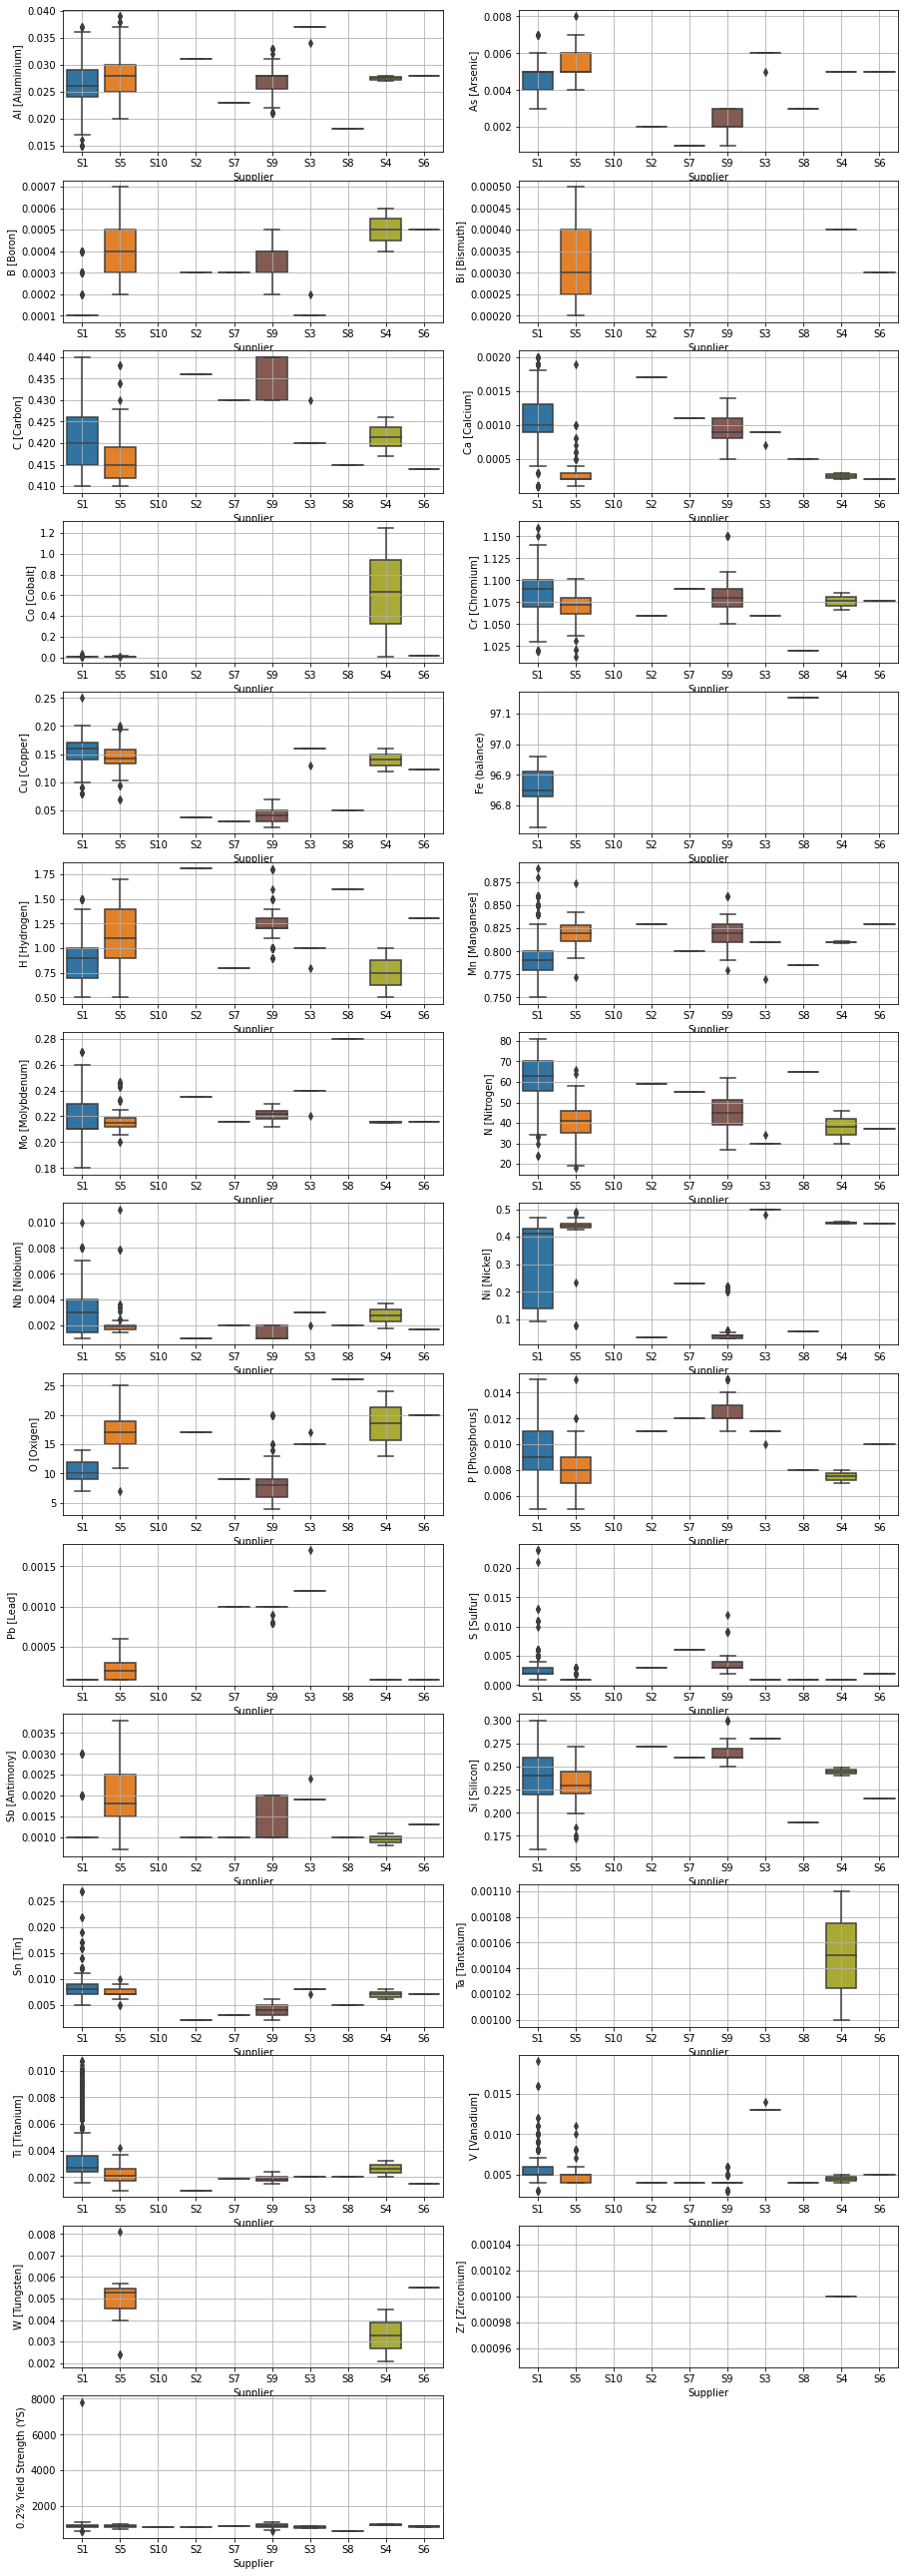

In [76]:
datacol = list(ds.select_dtypes(include=['float64','int64']))
datacol

#col=ds.columns
plt.figure(figsize=(15,100))

for i, column in enumerate(datacol):
  plt.subplot(32,2,i+1)
  sns.boxplot(data=ds, x=ds['Supplier'],y=ds[column])
  plt.grid()

In [65]:
ds = df[['Supplier','0.2% Yield Strength (YS)','B [Boron]','C [Carbon]', 'Ca [Calcium]', 
         'Cu [Copper]', 'H [Hydrogen]', 'N [Nitrogen]', 'Ni [Nickel]',
       'O [Oxigen]','Sb [Antimony]','V [Vanadium]']]
ds

,Supplier,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
0,S1,890.3,0.0001,0.420,0.0012,0.150,1.0,69.0,0.420,9.0,0.0010,0.005
1,S1,916.0,0.0001,0.421,0.0011,0.120,0.8,53.0,0.430,9.0,0.0010,0.005
2,S1,875.8,0.0001,0.422,0.0010,0.150,0.9,70.0,0.430,12.0,0.0010,0.005
3,S1,841.5,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
4,S1,833.4,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
1178,S5,819.5,0.0005,0.414,0.0002,0.134,1.7,38.0,0.435,14.0,0.0019,0.008
1179,S9,854.9,0.0004,0.440,0.0007,0.050,1.2,49.0,0.050,7.0,0.0010,0.004
1180,S1,941.5,0.0001,0.430,0.0013,0.200,1.1,70.0,0.420,11.0,0.0010,0.005
1181,S1,866.2,0.0001,0.416,0.0016,0.190,1.1,68.0,0.410,13.0,0.0010,0.006


In [28]:
ds.shape

(1183, 11)

In [29]:
ds.describe()

,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
count,1129.000000,1140.000000,1182.000000,1180.000000,1182.000000,1182.000000,1182.000000,1182.000000,1181.000000,1165.000000,1179.000000
mean,875.655270,0.000174,0.422165,0.000967,0.143093,0.955423,57.520305,0.297168,11.005080,0.001166,0.005476
std,222.383024,0.000137,0.008779,0.000404,0.042042,0.237788,12.417416,0.158580,3.476552,0.000461,0.001561
min,580.000000,0.000100,0.410000,0.000100,0.020000,0.500000,18.000000,0.030000,4.000000,0.000700,0.003000
25%,807.000000,0.000100,0.415000,0.000800,0.130000,0.800000,49.000000,0.130000,8.000000,0.001000,0.004000
50%,875.600000,0.000100,0.420000,0.001000,0.150000,0.900000,59.000000,0.410000,11.000000,0.001000,0.005000
75%,931.600000,0.000100,0.428000,0.001200,0.170000,1.100000,67.000000,0.430000,13.000000,0.001000,0.006000
max,7801.000000,0.000700,0.440000,0.002000,0.250000,1.810000,81.000000,0.500000,26.000000,0.003800,0.019000


In [30]:
ds.corr().round(5)*100

,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
0.2% Yield Strength (YS),100.000,0.807,0.528,5.218,0.328,3.778,1.660,8.517,3.209,1.120,1.660
B [Boron],0.807,100.000,16.454,-46.548,-49.358,47.778,-53.986,-11.747,29.403,65.225,-24.684
C [Carbon],0.528,16.454,100.000,9.945,-42.099,11.257,-7.880,-58.726,-26.538,-4.144,-11.759
Ca [Calcium],5.218,-46.548,9.945,100.000,11.799,-19.497,42.808,-11.651,-30.145,-35.870,15.559
Cu [Copper],0.328,-49.358,-42.099,11.799,100.000,-37.187,37.061,45.313,16.893,-9.381,26.187
H [Hydrogen],3.778,47.778,11.257,-19.497,-37.187,100.000,-23.560,-12.378,14.191,26.824,-9.770
N [Nitrogen],1.660,-53.986,-7.880,42.808,37.061,-23.560,100.000,-3.086,-31.411,-40.402,14.159
Ni [Nickel],8.517,-11.747,-58.726,-11.651,45.313,-12.378,-3.086,100.000,29.559,14.491,16.223
O [Oxigen],3.209,29.403,-26.538,-30.145,16.893,14.191,-31.411,29.559,100.000,39.220,2.349
Sb [Antimony],1.120,65.225,-4.144,-35.870,-9.381,26.824,-40.402,14.491,39.220,100.000,-4.019


In [31]:
ds.skew()

0.2% Yield Strength (YS)    26.787927
B [Boron]                    1.584550
C [Carbon]                   0.554702
Ca [Calcium]                -0.174508
Cu [Copper]                 -1.373252
H [Hydrogen]                 0.724159
N [Nitrogen]                -0.462119
Ni [Nickel]                 -0.424028
O [Oxigen]                   0.835028
Sb [Antimony]                3.152482
V [Vanadium]                 2.390961
dtype: float64

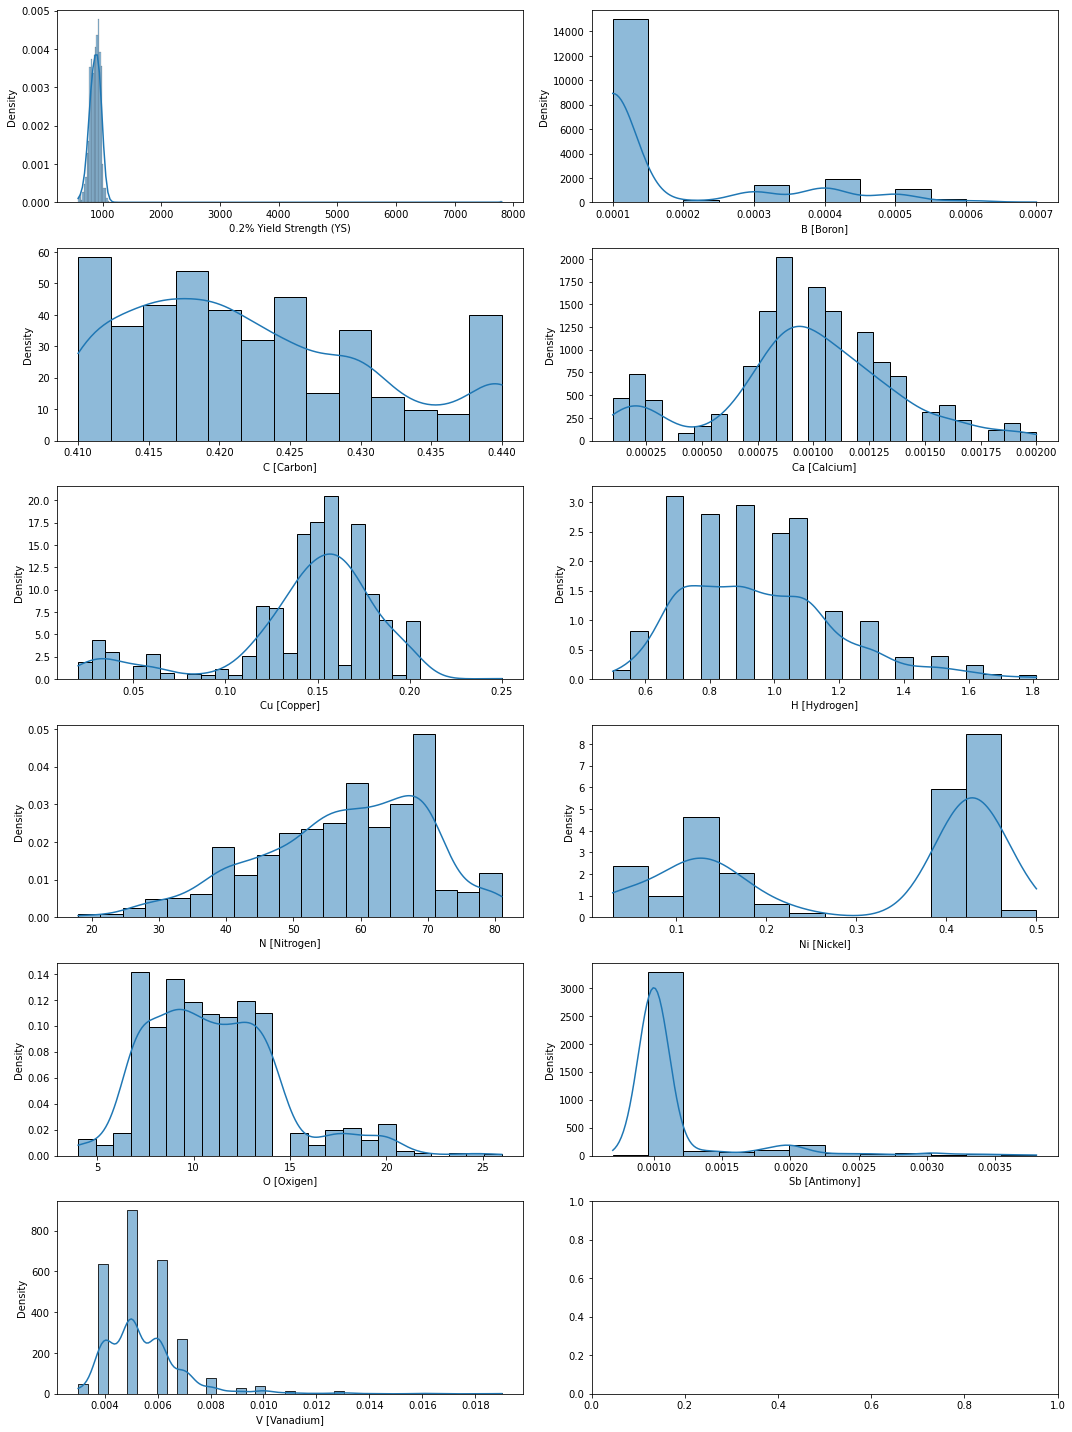

In [32]:
col=ds.columns

fig, axes=plt.subplots(6,2,figsize=(15,20))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.histplot(data=ds,x=ds[col], kde=True, stat='density',ax=ax)

fig.tight_layout()
plt.show()

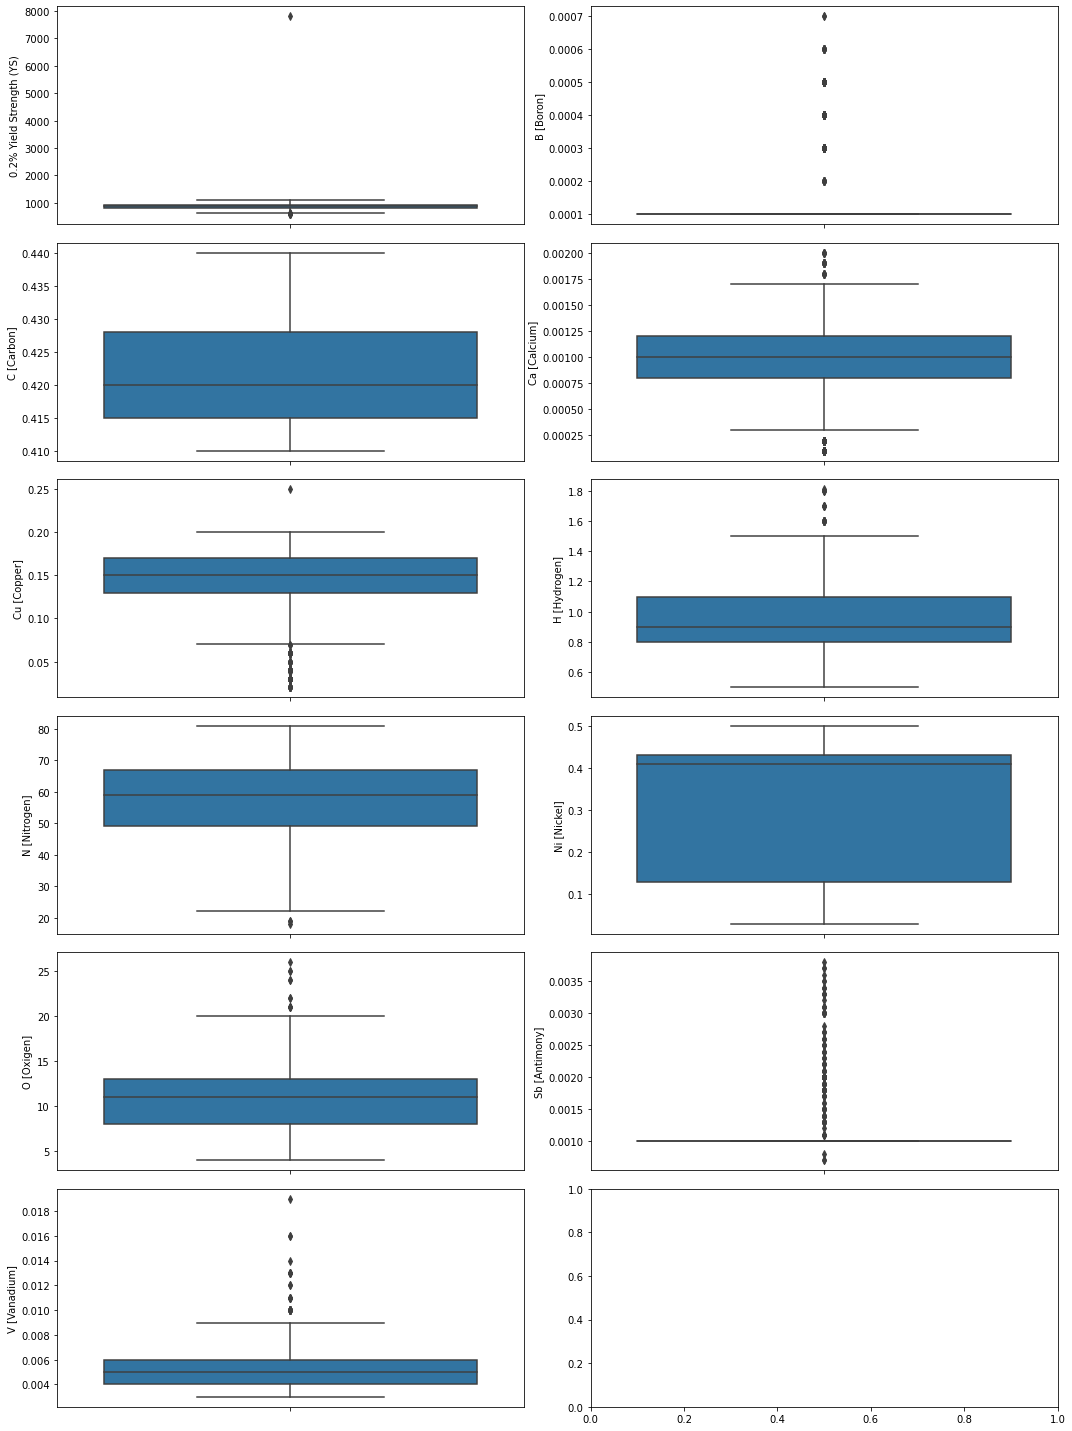

In [33]:
col=ds.columns

fig, axes=plt.subplots(6,2,figsize=(15,20))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.boxplot(data=ds,y=ds[col],ax=ax)

fig.tight_layout()
plt.show()

In [34]:
# Looking for outliers in Yield Strngth

ds[ds['0.2% Yield Strength (YS)']>1100]

,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
815,7801.0,0.0001,0.422,0.0016,0.18,1.1,70.0,0.42,11.0,0.001,0.005


In [67]:
# Removing the outliers in Yield Strngth

ds = ds[ds['0.2% Yield Strength (YS)'] < 1100]
ds

,Supplier,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
0,S1,890.3,0.0001,0.420,0.0012,0.150,1.0,69.0,0.420,9.0,0.0010,0.005
1,S1,916.0,0.0001,0.421,0.0011,0.120,0.8,53.0,0.430,9.0,0.0010,0.005
2,S1,875.8,0.0001,0.422,0.0010,0.150,0.9,70.0,0.430,12.0,0.0010,0.005
3,S1,841.5,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
4,S1,833.4,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...
1178,S5,819.5,0.0005,0.414,0.0002,0.134,1.7,38.0,0.435,14.0,0.0019,0.008
1179,S9,854.9,0.0004,0.440,0.0007,0.050,1.2,49.0,0.050,7.0,0.0010,0.004
1180,S1,941.5,0.0001,0.430,0.0013,0.200,1.1,70.0,0.420,11.0,0.0010,0.005
1181,S1,866.2,0.0001,0.416,0.0016,0.190,1.1,68.0,0.410,13.0,0.0010,0.006


In [36]:
ds.shape

(1128, 11)

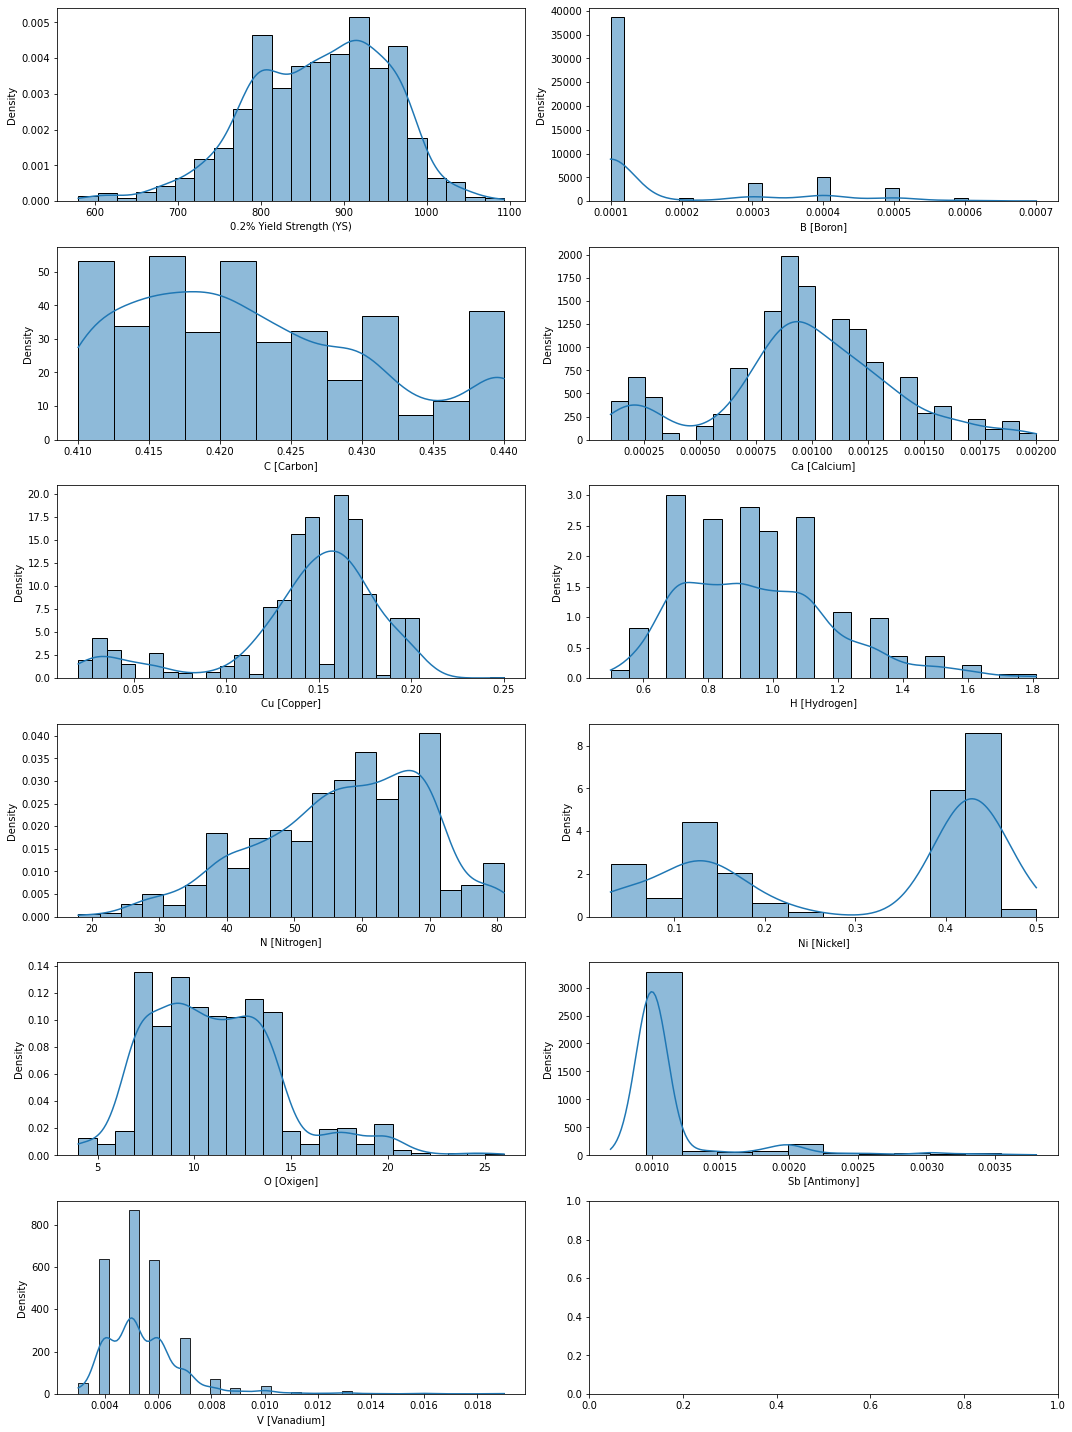

In [37]:
col=ds.columns

fig, axes=plt.subplots(6,2,figsize=(15,20))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.histplot(data=ds,x=ds[col], kde=True, stat='density',ax=ax)

fig.tight_layout()
plt.show()

In [64]:
ds

,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
0,890.3,0.0001,0.420,0.0012,0.150,1.0,69.0,0.420,9.0,0.0010,0.005
1,916.0,0.0001,0.421,0.0011,0.120,0.8,53.0,0.430,9.0,0.0010,0.005
2,875.8,0.0001,0.422,0.0010,0.150,0.9,70.0,0.430,12.0,0.0010,0.005
3,841.5,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
4,833.4,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
...,...,...,...,...,...,...,...,...,...,...,...
1178,819.5,0.0005,0.414,0.0002,0.134,1.7,38.0,0.435,14.0,0.0019,0.008
1179,854.9,0.0004,0.440,0.0007,0.050,1.2,49.0,0.050,7.0,0.0010,0.004
1180,941.5,0.0001,0.430,0.0013,0.200,1.1,70.0,0.420,11.0,0.0010,0.005
1181,866.2,0.0001,0.416,0.0016,0.190,1.1,68.0,0.410,13.0,0.0010,0.006


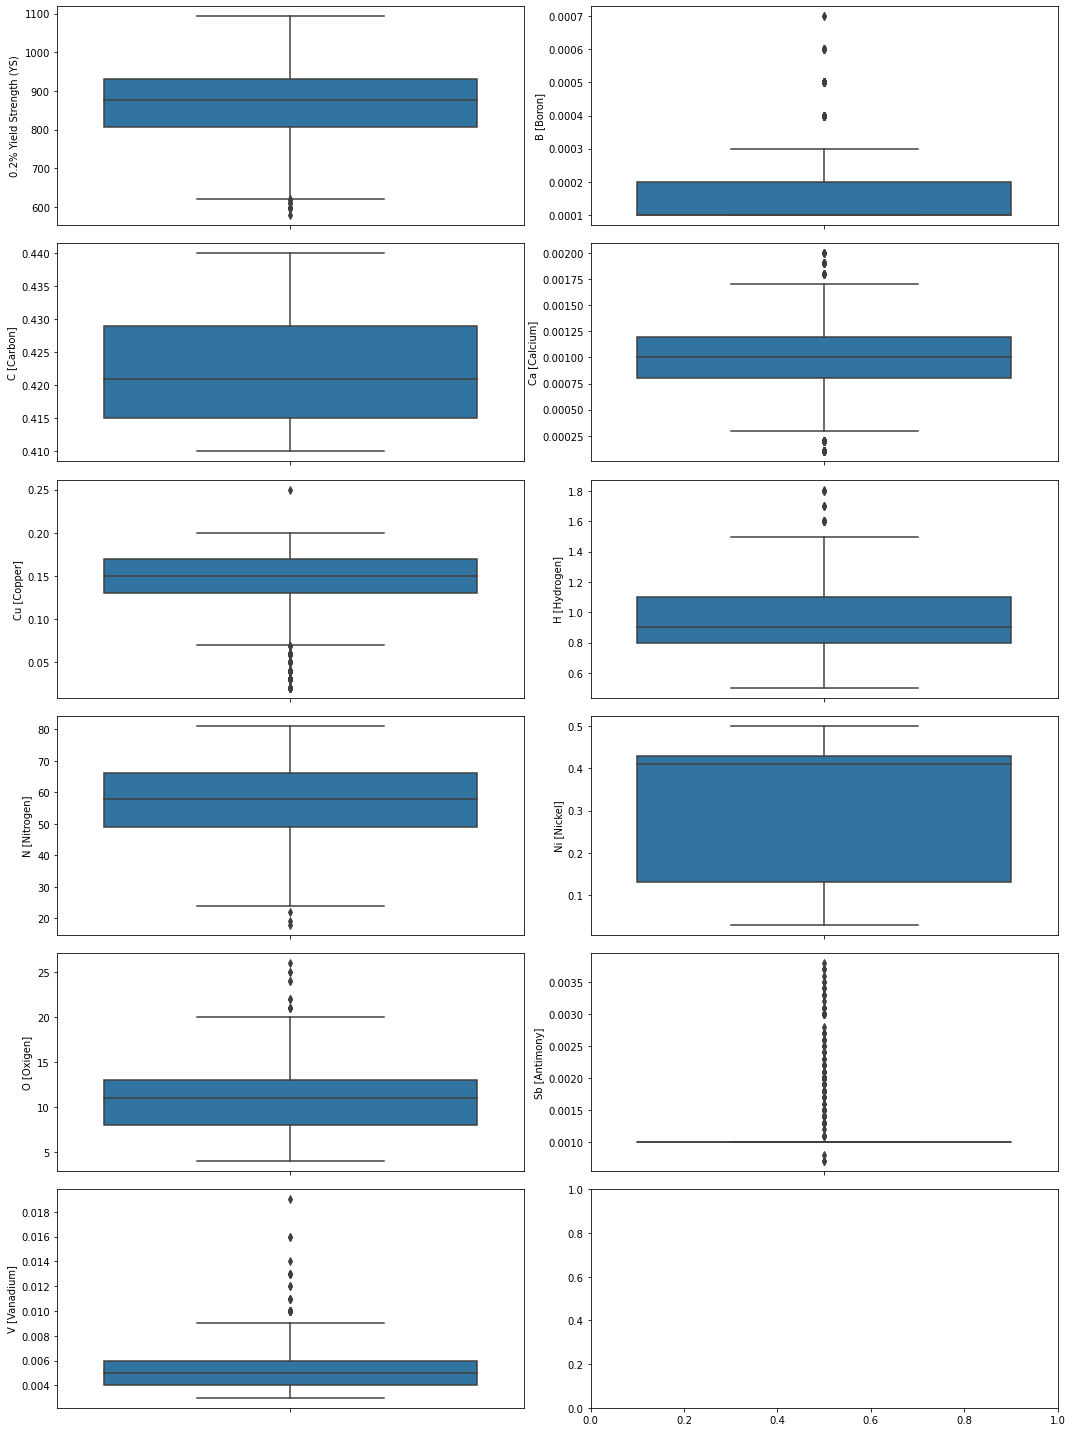

In [38]:
col=ds.columns

fig, axes=plt.subplots(6,2,figsize=(15,20))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.boxplot(data=ds,y=ds[col],ax=ax)

fig.tight_layout()
plt.show()

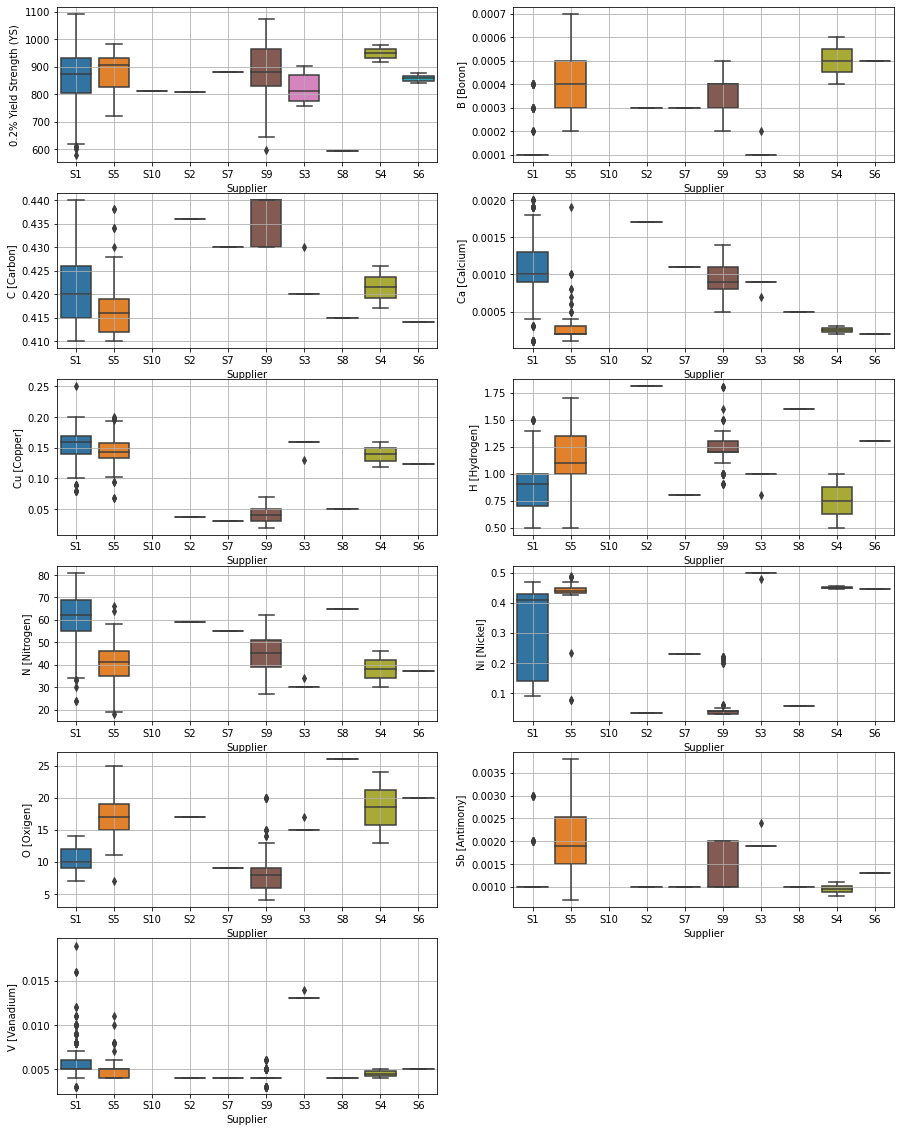

In [71]:
datacol = list(ds.select_dtypes(include=['float64','int64']))
datacol

#col=ds.columns
plt.figure(figsize=(15,20))

for i, column in enumerate(datacol):
  plt.subplot(6,2,i+1)
  sns.boxplot(data=ds, x=ds['Supplier'],y=ds[column])
  plt.grid()

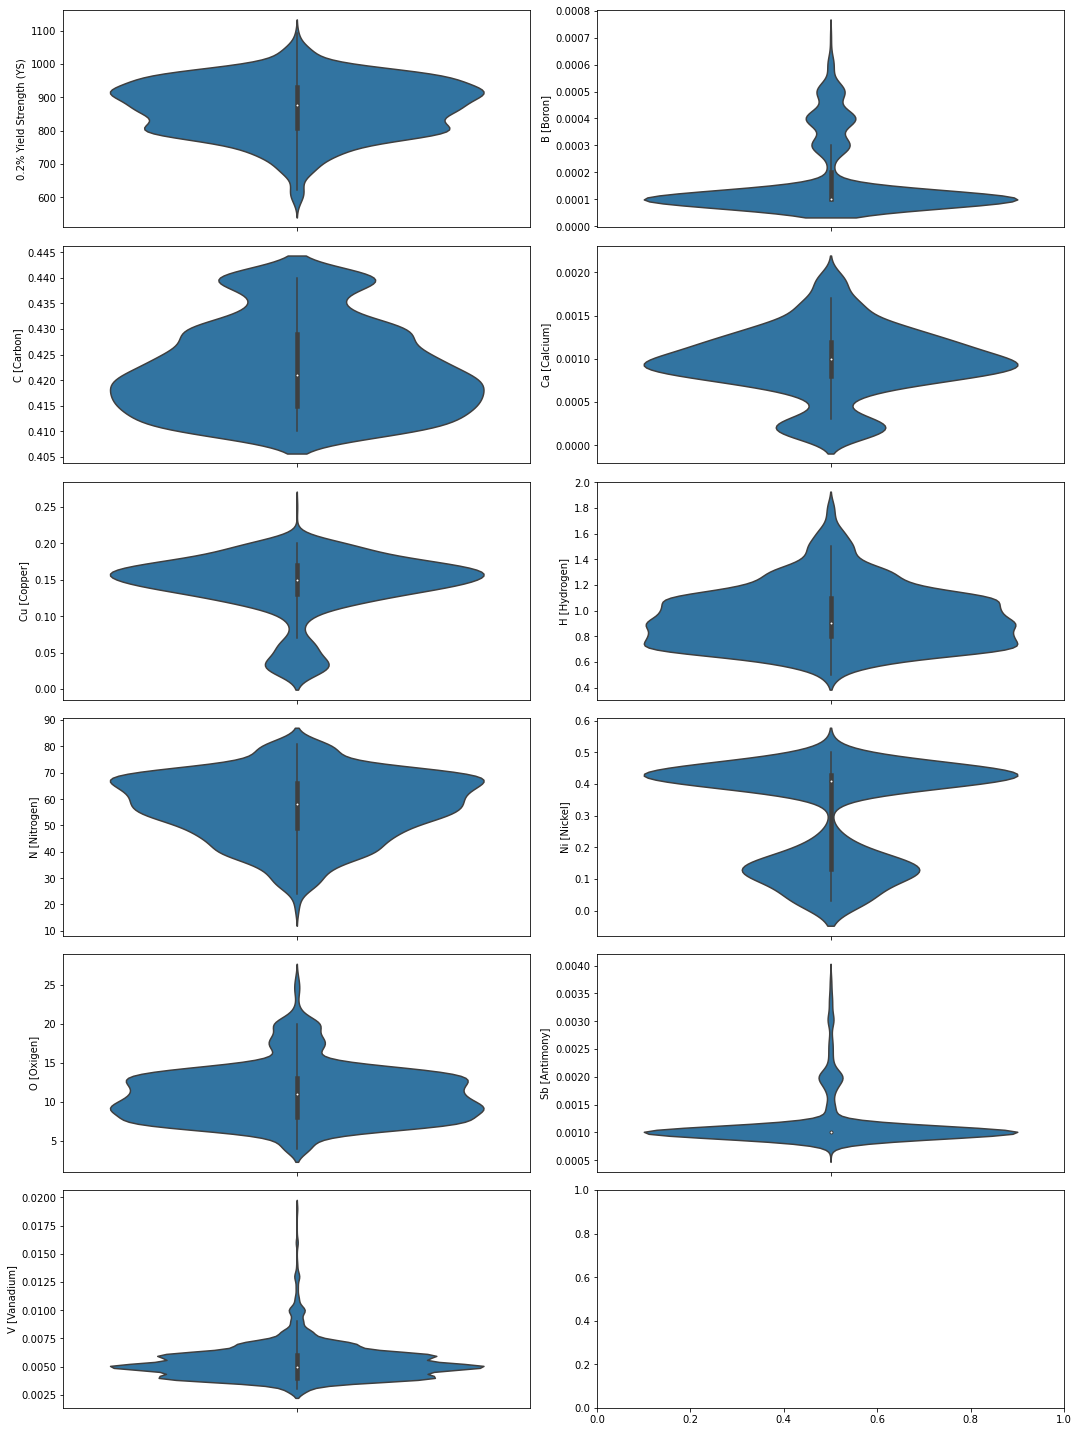

In [39]:
col=ds.columns

fig, axes=plt.subplots(6,2,figsize=(15,20))
axes=axes.ravel()

for col,ax in zip(col,axes):
    sns.violinplot(data=ds,y=ds[col],ax=ax)

fig.tight_layout()
plt.show()

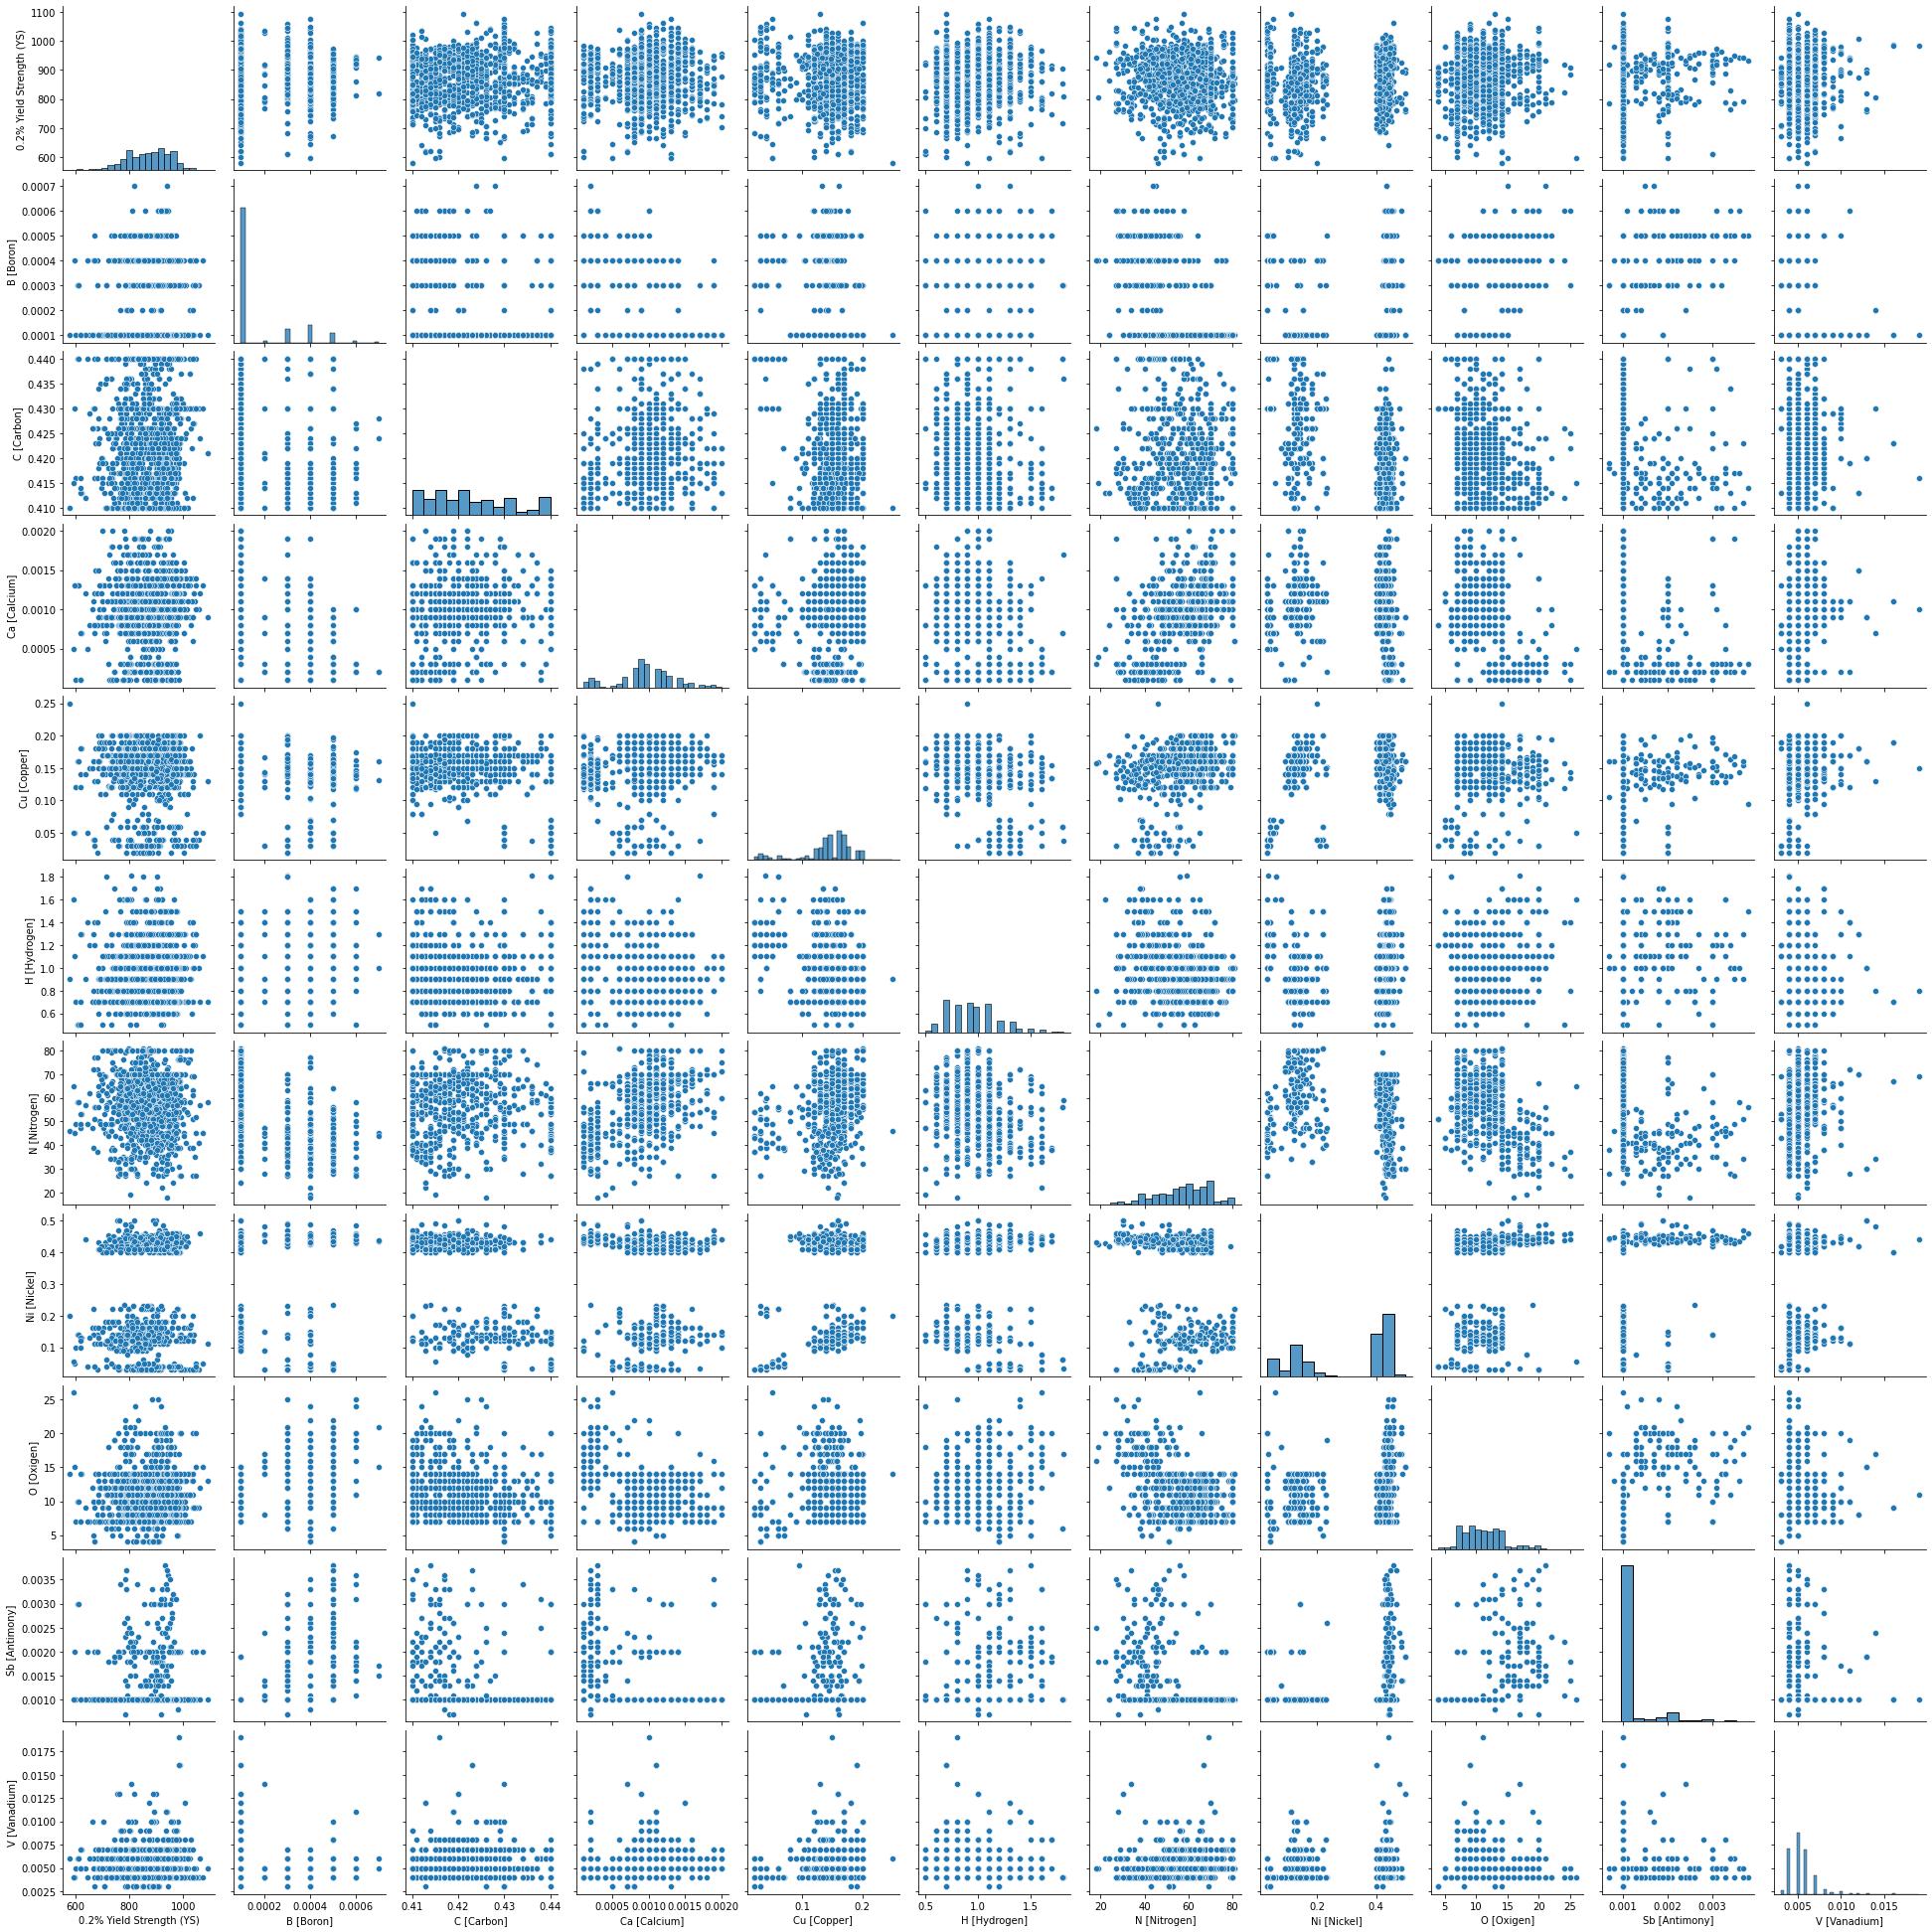

In [40]:
sns.pairplot(ds)

<AxesSubplot:>

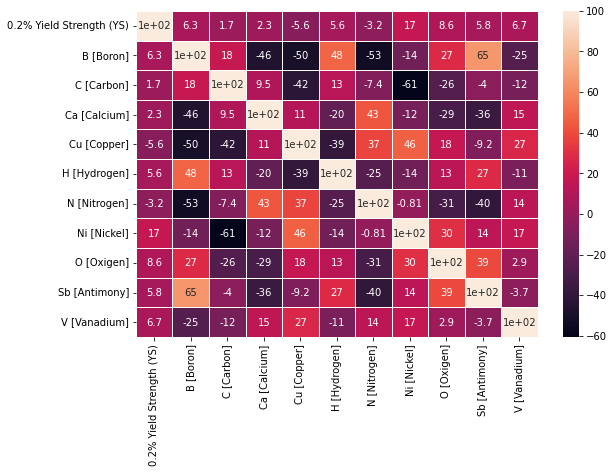

In [41]:
f, ax = plt.subplots(figsize=(9, 6))
dd = ds.corr()*100
sns.heatmap(dd, annot=True, linewidths=.5, ax=ax)

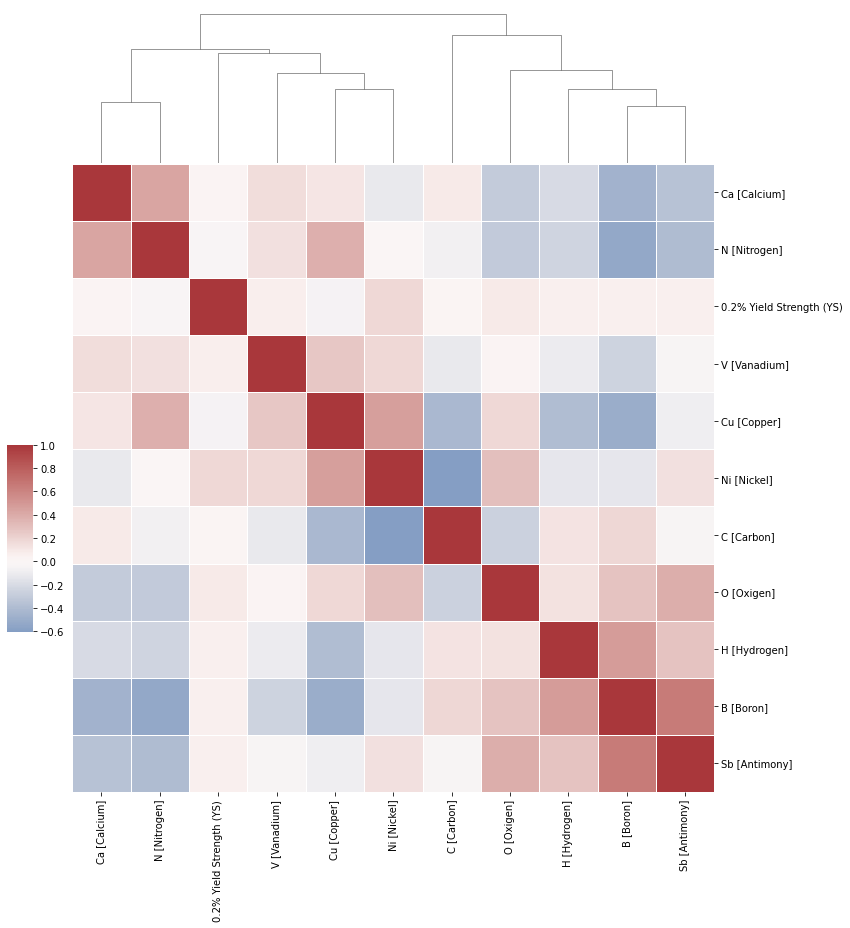

In [42]:
#networks = ds.columns.get_level_values("network")
#network_colors = pd.Series(networks, index=ds.columns).map(network_lut)

g = sns.clustermap(ds.corr(), center=0, cmap="vlag",
                   #row_colors=network_colors, #col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [43]:
ds.columns

Index(['0.2% Yield Strength (YS)', 'B [Boron]', 'C [Carbon]', 'Ca [Calcium]',
       'Cu [Copper]', 'H [Hydrogen]', 'N [Nitrogen]', 'Ni [Nickel]',
       'O [Oxigen]', 'Sb [Antimony]', 'V [Vanadium]'],
      dtype='object')

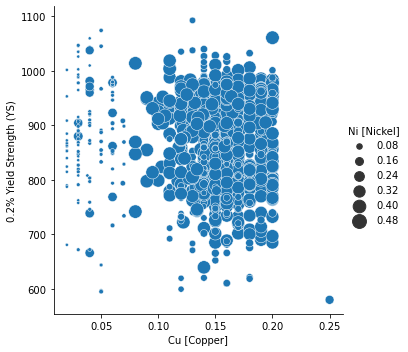

In [44]:
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(data=ds,
    x="Cu [Copper]", y="0.2% Yield Strength (YS)",
    size="Ni [Nickel]",
    palette=cmap, sizes=(10, 200),
)

C:\Users\mohammed\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1740: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  f.tight_layout()


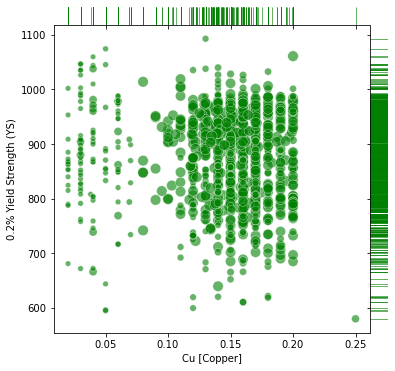

In [45]:
g = sns.JointGrid(data=ds, x="Cu [Copper]", y="0.2% Yield Strength (YS)", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=ds["Ni [Nickel]"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<AxesSubplot:xlabel='Cu [Copper]', ylabel='0.2% Yield Strength (YS)'>

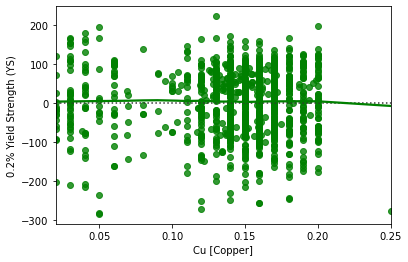

In [46]:
sns.residplot(x=ds["Cu [Copper]"], y=ds["0.2% Yield Strength (YS)"], lowess=True, color="g")

In [47]:
RMds = ds[['0.2% Yield Strength (YS)','B [Boron]','C [Carbon]', 'Ca [Calcium]', 
         'Cu [Copper]', 'H [Hydrogen]', 'N [Nitrogen]', 'Ni [Nickel]',
       'O [Oxigen]','Sb [Antimony]','V [Vanadium]']]
RMds

,0.2% Yield Strength (YS),B [Boron],C [Carbon],Ca [Calcium],Cu [Copper],H [Hydrogen],N [Nitrogen],Ni [Nickel],O [Oxigen],Sb [Antimony],V [Vanadium]
0,890.3,0.0001,0.420,0.0012,0.150,1.0,69.0,0.420,9.0,0.0010,0.005
1,916.0,0.0001,0.421,0.0011,0.120,0.8,53.0,0.430,9.0,0.0010,0.005
2,875.8,0.0001,0.422,0.0010,0.150,0.9,70.0,0.430,12.0,0.0010,0.005
3,841.5,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
4,833.4,0.0004,0.416,0.0012,0.130,0.7,77.0,0.110,7.0,0.0020,0.005
...,...,...,...,...,...,...,...,...,...,...,...
1178,819.5,0.0005,0.414,0.0002,0.134,1.7,38.0,0.435,14.0,0.0019,0.008
1179,854.9,0.0004,0.440,0.0007,0.050,1.2,49.0,0.050,7.0,0.0010,0.004
1180,941.5,0.0001,0.430,0.0013,0.200,1.1,70.0,0.420,11.0,0.0010,0.005
1181,866.2,0.0001,0.416,0.0016,0.190,1.1,68.0,0.410,13.0,0.0010,0.006


In [48]:
RMds.shape

(1128, 11)

In [49]:
RMds = RMds.dropna()
RMds.shape

(1075, 11)

In [50]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [52]:
X=RMds[['B [Boron]','C [Carbon]', 'Ca [Calcium]', 
         'Cu [Copper]', 'H [Hydrogen]', 'N [Nitrogen]', 'Ni [Nickel]',
       'O [Oxigen]','Sb [Antimony]','V [Vanadium]']]

y=RMds[['0.2% Yield Strength (YS)']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

In [53]:
# Building pipelins of standard scaler and model for various regressors.

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])



# List of all the pipelines

pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]



# Dictionary of pipelines and model types for ease of reference

pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}



# Fit the pipelines

for pipe in pipelines:
    pipe.fit(X_train, y_train)

C:\Users\mohammed\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [54]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -78.950987 
DecisionTree: -94.750587 


C:\Users\mohammed\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mohammed\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mohammed\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
C:\Users\mohammed\Anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was ex

RandomForest: -78.994502 
KNeighbors: -82.280625 
XGBRegressor: -86.967716 


In [55]:
# Model prediction on test data

pred = pipeline_xgb.predict(X_test)

In [56]:
# Model Evaluation

print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: -0.14246825583050682
Adjusted R^2: -0.18674997117277448
MAE: 65.80563352223223
MSE: 8023.158613133904
RMSE: 89.57208612695086
